In [1]:
import numpy
import netCDF4
import matplotlib.pyplot as mp
import pandas

degree_sign = u'\u00B0'
mp.rcParams.update({'mathtext.default': 'regular'})
mp.rcParams['hatch.color'] = '0.5'

% matplotlib inline

In [2]:
PRECT_lat = numpy.load('/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/PRECT_lat.npy')
PRECT_lon = numpy.load('/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/PRECT_lon.npy')

PRECT_nlat = 26
PRECT_nlon = 25

In [3]:
filename = 'time_series_event_counts_'+'ALL_LATLON'+'.nc'

working_dir = '/Users/baird/Dropbox/Precipitation Extremes Project/Whiplash_manuscript/time_series/'
ncfile = netCDF4.Dataset(working_dir+filename,'r','NetCDF4')

In [15]:
print(ncfile.variables.keys())
time_var = ncfile.variables['time']
lat = ncfile.variables['lat'][:]
lon = ncfile.variables['lon'][:]
ensemble = ncfile.variables['ensemble'][:]
all_events_40_separate_ens = ncfile.variables['25yr_1season_wet_all_events_40_separate_ens'][:]
all_events_40_summed_30yr_avg_percent = ncfile.variables['25yr_1season_wet_all_events_40_summed_30yr_avg_percent'][:]
all_events_40_summed = ncfile.variables['25yr_1season_wet_all_events_40_summed'][:]
all_events_40_summed_30yr_avg_percent = ncfile.variables['25yr_1season_wet_all_events_40_summed_30yr_avg_percent'][:]
pic_count = ncfile.variables['25yr_1season_wet_pic_count'][:]

odict_keys(['time', 'lat', 'lon', 'ensemble', '100yr_3season_dry_all_events_40_separate_ens', '100yr_3season_dry_all_events_40_summed_30yr_avg_percent', '100yr_3season_dry_all_events_40_summed', '100yr_3season_pic_count', '100yr_1season_dry_all_events_40_separate_ens', '100yr_1season_dry_all_events_40_summed_30yr_avg_percent', '100yr_1season_dry_all_events_40_summed', '100yr_1season_pic_count', '25yr_1season_wet_all_events_40_separate_ens', '25yr_1season_wet_all_events_40_summed_30yr_avg_percent', '25yr_1season_wet_all_events_40_summed', '25yr_1season_wet_pic_count', '200yr_40d_wet_all_events_40_separate_ens', '200yr_40d_wet_all_events_40_summed_30yr_avg_percent', '200yr_40d_wet_all_events_40_summed', '200yr_40d_wet_pic_count'])


In [5]:
print(pic_count.shape)
print(all_events_40_separate_ens.shape)

(26, 25)
(180, 40, 26, 25)


In [6]:
rolling_mean_vals = numpy.zeros((all_events_40_separate_ens.shape))
for ens_idx in range(40):
    print(ens_idx)
    for i in range(26):
        for j in range(25):
            tseries = pandas.Series(all_events_40_separate_ens[:,ens_idx,i,j])
            rolling_mean_vals[:,ens_idx,i,j] = numpy.array(tseries.rolling(window=30, center=True).mean())    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [7]:
rolling_mean_vals_percent = numpy.zeros((180,40,26,25))
for ens_idx in range(40):
    for i in range(26):
        for j in range(25):
            pic_count_val = pic_count[i,j]/(1798)
            rolling_mean_vals_percent[:,ens_idx,i,j] = 100*(rolling_mean_vals[:,ens_idx,i,j]-pic_count_val)/pic_count_val

In [8]:
pic_expand_counts = numpy.ones((all_events_40_separate_ens.shape))*pic_count[0,0]
percent_change = 100*(all_events_40_separate_ens-pic_expand_counts/1798)/(pic_expand_counts/1798)
percent_change_rolling_mean = numpy.zeros((percent_change.shape))
for ens_idx in range(40):
    print(ens_idx)
    for i in range(26):
        for j in range(25):
            tseries = pandas.Series(percent_change[:,ens_idx,i,j])
            percent_change_rolling_mean[:,ens_idx,i,j] = numpy.array( tseries.rolling(window=30,center=True).mean() )

0


/Users/baird/anaconda/lib/python3.6/site-packages/pandas/core/window.py:240: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  values[np.isinf(values)] = np.NaN


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [9]:
pic_expand_counts = numpy.ones((rolling_mean_vals.shape))*pic_count[0,0]
pic_expand_counts_rolling_mean = numpy.zeros((pic_expand_counts.shape))*numpy.nan
for ens_idx in range(40):
    print(ens_idx)
    for i in range(26):
        for j in range(25):
            tseries = pandas.Series(pic_expand_counts[:,ens_idx,i,j])
            pic_expand_counts_rolling_mean[:,ens_idx,i,j] = numpy.array((tseries.rolling(window=30, center=True).mean()))
pic_expand_counts_rolling_mean /= 1798.

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [10]:
# how Daniel calculated this
percent_diff_calculation = 100.*(rolling_mean_vals - pic_expand_counts_rolling_mean) / pic_expand_counts_rolling_mean

/Users/baird/anaconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


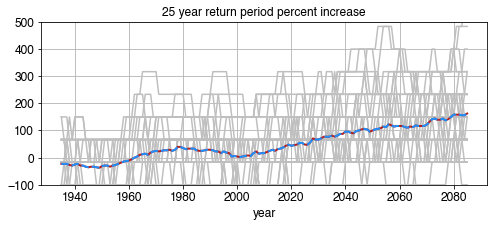

In [64]:
fig,ax = mp.subplots()
fig.set_size_inches(8,3)
fontsize=12

lat_idx = 9
lon_idx = 17
#rolling_mean_vals_perc_mean = numpy.mean(rolling_mean_vals_percent[:,:,lat_idx,lon_idx], axis=1)
#rolling_mean_vals_perc_mean = numpy.nanmean(percent_diff_calculation[:,:,lat_idx,lon_idx], axis=1)
rolling_mean_vals_perc_mean = numpy.nanmean(percent_change_rolling_mean[:,:,lat_idx,lon_idx], axis=1)

for ens_idx in range(40):
    ax.plot(numpy.arange(1920,2100), percent_change_rolling_mean[:,ens_idx,lat_idx,lon_idx], color='0.75')

ax.plot(numpy.arange(1920,2100), rolling_mean_vals_perc_mean, lw=2, color='firebrick')
#ax.plot(numpy.arange(1920,2100), pandas.Series(rolling_mean_vals_perc_mean).rolling(window=30, center=True).mean())
ax.grid()
ax.set_xlabel('year', fontsize=fontsize)
ax.set_ylim(-100,500)

ax.plot(numpy.arange(1920,2100), all_events_40_summed_30yr_avg_percent[:,lat_idx,lon_idx], lw=2, ls='--', c='dodgerblue')

ax.tick_params(labelsize=fontsize)
ax.set_title('25 year return period percent increase')
#for ens_idx in range(40):
#    mp.plot(numpy.arange(1920,2100), rolling_mean_vals_percent[:,ens_idx,i,j])

In [44]:
print(PRECT_lat[9])
print(PRECT_lon[17])

34.3979057592
241.25


In [45]:
print(PRECT_lat)
print(PRECT_lon)

[ 25.91623037  26.85863874  27.80104712  28.7434555   29.68586387
  30.62827225  31.57068063  32.51308901  33.45549738  34.39790576
  35.34031414  36.28272251  37.22513089  38.16753927  39.10994764
  40.05235602  40.9947644   41.93717277  42.87958115  43.82198953
  44.76439791  45.70680628  46.64921466  47.59162304  48.53403141
  49.47643979]
[ 220.    221.25  222.5   223.75  225.    226.25  227.5   228.75  230.
  231.25  232.5   233.75  235.    236.25  237.5   238.75  240.    241.25
  242.5   243.75  245.    246.25  247.5   248.75  250.  ]


(180, 26, 25)


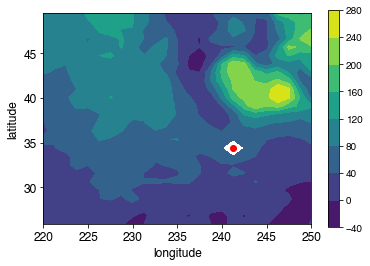

In [62]:
print(all_events_40_summed_30yr_avg_percent.shape)
a = all_events_40_summed_30yr_avg_percent.mean(axis=0)
a[9,17]=numpy.nan
cf=mp.contourf(PRECT_lon,PRECT_lat,a)
#cf=mp.imshow(a)
mp.axes().set_aspect('equal')
mp.scatter(PRECT_lon[17], PRECT_lat[9], c='red')

mp.axes().tick_params(labelsize=fontsize)
mp.xlabel('longitude', fontsize=fontsize)
mp.ylabel('latitude', fontsize=fontsize)

mp.colorbar(cf)
#mp.scatter(PRECT_lon[9], PRECT_lat[17], c='red')

In [63]:
print(a[-1,:])

[92.00496688741723 88.46311051324503 108.37748344370861 105.86923763451986
 127.18933671357615 128.1126991928808 119.15468491307946 136.97424720612582
 122.71034250827815 97.10415588783113 57.52345043460265 35.15595250413907
 16.247624883588575 -1.2136426508821399 20.988488203642383
 31.33846298116722 78.67818708609272 68.08014279801324 39.73144207884934
 41.41278844163907 52.17619839093543 167.6658345405629 183.59733288493376
 155.84125362168874 163.97234581953643]


In [47]:
b = numpy.arange(100).reshape((10,10))

In [48]:
b[0,0]

0

In [49]:
b[0,1]

1

In [50]:
b[1,1]

11